In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from collections import Counter

In [294]:
movies = pd.read_csv('/Users/jacobtryba/DSI/assignments/capstone2/data/imdb-extensive-dataset/IMDb movies.csv')
movies_subset = ['description','director','imdb_title_id', 'title', 'year','duration', 'country','budget', 'usa_gross_income', 'worlwide_gross_income']
movies_subbed = movies[movies_subset]
movies_current = movies_subbed
movies_current_usa = movies_current.query('country == "USA"')
movies_current_usa_nonnull_ugi = movies_current_usa[(movies_current_usa.usa_gross_income.notnull())]
movies_current_usa_nonnull_ugi_budget = movies_current_usa_nonnull_ugi[(movies_current_usa_nonnull_ugi.budget.notnull())]
final_set = movies_current_usa_nonnull_ugi_budget.sort_values('year', ascending = True)
final_set['budget'] = final_set['budget'].str.replace('$', '')
final_set['budget'] = final_set['budget'].str.replace('$ ', '')
final_set['budget'] = final_set['budget'].str.replace('GBP ', '')
final_set['budget'] = final_set['budget'].str.replace('AUD ', '')
final_set['budget'] = final_set['budget'].str.replace('EUR ', '')
final_set['budget'] = final_set['budget'].str.replace('ESP ', '')
final_set['budget'] = final_set['budget'].str.replace('CAD ', '')
final_set['usa_gross_income'] = final_set['usa_gross_income'].str.replace('$ ', '')
final_set['usa_gross_income'] = final_set['usa_gross_income'].str.replace('$', '').astype('int')
final_set['worlwide_gross_income_gross_income'] = final_set['worlwide_gross_income'].str.replace('$ ', '')
final_set['worlwide_gross_income'] = final_set['worlwide_gross_income'].str.replace('$', '').astype('int')
final_set['international_gross_income'] = (final_set['worlwide_gross_income'] - final_set['usa_gross_income'])
final_set['returns'] = (final_set['worlwide_gross_income'] - final_set['budget'].astype('int'))
final_set['profitable'] = [1 if x > 0 else 0 for x in final_set['returns']]

In [295]:
final_set.head(10)

,description,director,imdb_title_id,title,year,duration,country,budget,usa_gross_income,worlwide_gross_income,worlwide_gross_income_gross_income,international_gross_income,returns,profitable
232,An extended family split up in France and Germ...,Rex Ingram,tt0012190,The Four Horsemen of the Apocalypse,1921,150,USA,800000,9183673,9183673,$ 9183673,0,8383673,1
1005,"With the aid of a wealthy erratic tippler, a d...",Charles Chaplin,tt0021749,City Lights,1931,87,USA,1500000,19181,32609,$ 32609,13428,-1467391,0
2336,The Tramp struggles to live in modern industri...,Charles Chaplin,tt0027977,Modern Times,1936,87,USA,1500000,163577,445226,$ 445226,281649,-1054774,0
2687,Exiled into the dangerous forest by her wicked...,"William Cottrell, David Hand",tt0029583,Snow White and the Seven Dwarfs,1937,83,USA,1499000,184925486,184925486,$ 184925486,0,183426486,1
3100,A manipulative woman and a roguish man conduct...,"Victor Fleming, George Cukor",tt0031381,Gone with the Wind,1939,238,USA,3977000,200852579,402352579,$ 402352579,201500000,398375579,1
3180,A naive man is appointed to fill a vacancy in ...,Frank Capra,tt0031679,Mr. Smith Goes to Washington,1939,129,USA,1900000,144738,144738,$ 144738,0,-1755262,0
3277,Dorothy Gale is swept away from a farm in Kans...,"Victor Fleming, George Cukor",tt0032138,The Wizard of Oz,1939,102,USA,2777000,24790250,26120538,$ 26120538,1330288,23343538,1
3487,"A living puppet, with the help of a cricket as...","Norman Ferguson, T. Hee",tt0032910,Pinocchio,1940,88,USA,2600000,84254167,121892045,$ 121892045,37637878,119292045,1
3378,A collection of animated interpretations of gr...,"James Algar, Samuel Armstrong",tt0032455,Fantasia,1940,125,USA,2280000,76408097,76411401,$ 76411401,3304,74131401,1
3623,"Following the death of publishing tycoon, Char...",Orson Welles,tt0033467,Citizen Kane,1941,119,USA,839727,1585634,1594107,$ 1594107,8473,754380,1


In [296]:
all_train.groupby('director_2')['title'].nunique()

director_2
A. Raven Cruz                        1
A.M. Lukas                           1
Aaron Blaise, Robert Walker          1
Aaron Horvath, Peter Rida Michail    1
Aaron J. Wiederspahn                 1
                                    ..
Zack Snyder                          2
Zackary Adler                        1
Zak Penn                             1
Ziad H. Hamzeh                       1
Zoran Lisinac                        1
Name: title, Length: 2235, dtype: int64

In [297]:
all_train = final_set
profit_train = final_set.query('profitable == 1').copy()
loss_train = final_set.query('profitable == 0').copy()

In [298]:
# All Data 1985-2015
f = all_train.groupby('director')['title'].nunique()
f = pd.DataFrame(f).reset_index()
director_dict = {}
f_list = f['director'].values.copy()
f_list2 = f['title'].values.copy()
director_dict = {
    f_list[i]:f_list2[i] for i in range(len(f_list))
}
all_train['director_2'] = all_train['director']
all_train['director'] = all_train['director'].map(director_dict)


In [299]:

# Profit Data 1985-201
f = profit_train.groupby('director')['title'].nunique()
f = pd.DataFrame(f).reset_index()
director_dict = {}
f_list = f['director'].values.copy()
f_list2 = f['title'].values.copy()
director_dict = {
    f_list[i]:f_list2[i] for i in range(len(f_list))
}
profit_train['director_2'] = profit_train['director']
profit_train['director'] = profit_train['director'].map(director_dict)

In [300]:

# Loss Data 1985-201
f = loss_train.groupby('director')['title'].nunique()
f = pd.DataFrame(f).reset_index()
director_dict = {}
f_list = f['director'].values.copy()
f_list2 = f['title'].values.copy()
director_dict = {
    f_list[i]:f_list2[i] for i in range(len(f_list))
}
loss_train['director_2'] = loss_train['director']
loss_train['director'] = loss_train['director'].map(director_dict)

In [301]:
## Plotting EDA ##

In [302]:
histogram_subset = ['director']
dir_hist_subset = ['director', 'director_2']

In [303]:
p_directors = profit_train[histogram_subset]
l_directors = loss_train[histogram_subset]
all_directors = all_train[histogram_subset]

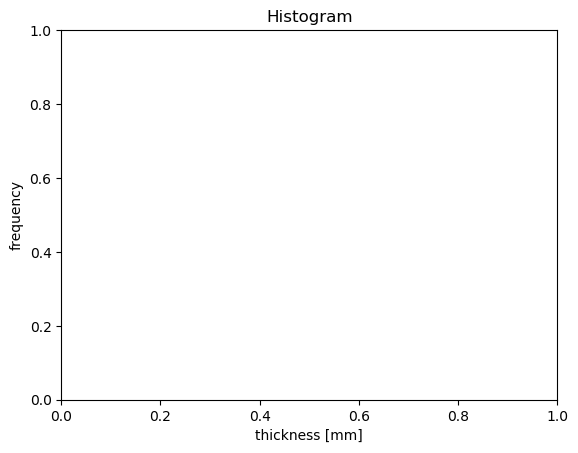

In [304]:
plt.xlabel('thickness [mm]')
plt.ylabel('frequency')
plt.title('Histogram')
plt.show()

In [305]:
mylabels = 0

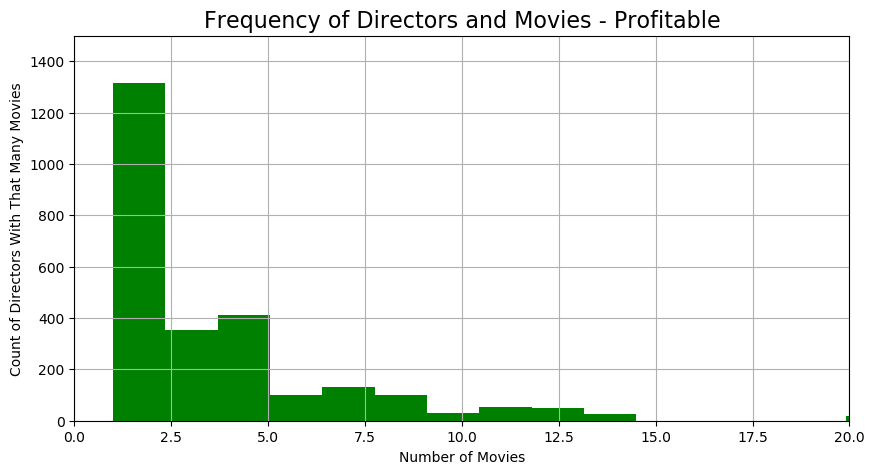

In [306]:
p_hist = p_directors.hist(bins=20, figsize = (10,5), color = 'g')
plt.style.use('default')
plt.style.use('default')
plt.title('Frequency of Directors and Movies - Profitable', size = 16)
plt.xlabel('Number of Movies')
plt.ylabel('Count of Directors With That Many Movies')
plt.xlim(0,20)
plt.ylim(0,1500)
plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/profitdirectorhistogram.png')


# data, column=None, by=None, grid=True, xlabelsize=None, 
# xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, 
# sharey=False, figsize=None, layout=None, bins=10, backend=None, **kwargs

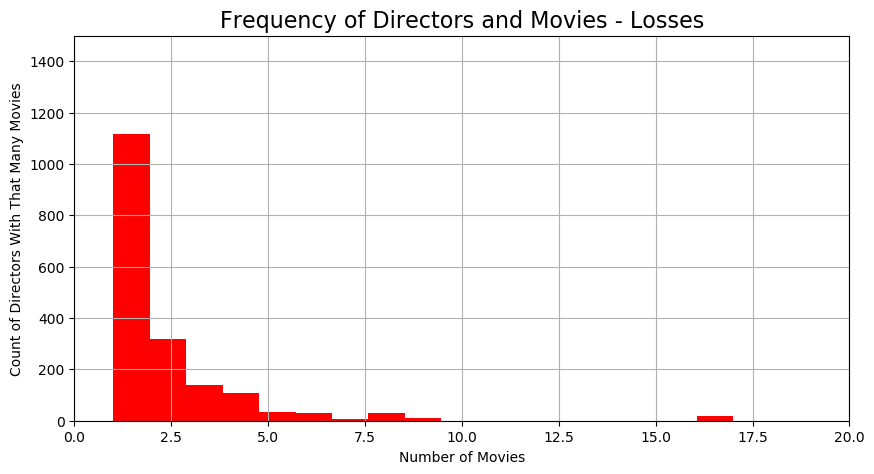

In [307]:
l_hist = l_directors.hist(bins=17, figsize = (10,5), color = 'r')
plt.style.use('default')
plt.title('Frequency of Directors and Movies - Losses', size = 16)
plt.xlabel('Number of Movies')
plt.ylabel('Count of Directors With That Many Movies')
plt.xlim(0,20)
plt.ylim(0,1500)

plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/lossdirectorhistogram.png')

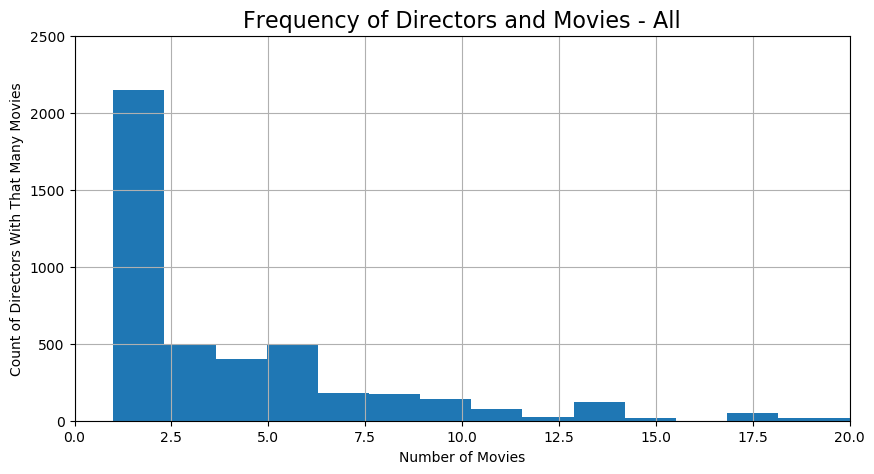

In [308]:
all_hist = all_directors.hist(bins=25, figsize = (10,5))
plt.style.use('default')
plt.title('Frequency of Directors and Movies - All', size = 16)
plt.xlabel('Number of Movies')
plt.ylabel('Count of Directors With That Many Movies')
plt.xlim(0,20)
plt.ylim(0,2500)

plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/alldirectorhistogram.png')

In [309]:
p_directors = profit_train[histogram_subset]
l_directors = loss_train[histogram_subset]
all_directors = all_train[histogram_subset]

In [310]:
p_minus1 = p_directors.query('director > 1')
l_minus1 = l_directors.query('director > 1')
all_minus1 = all_directors.query('director > 1')

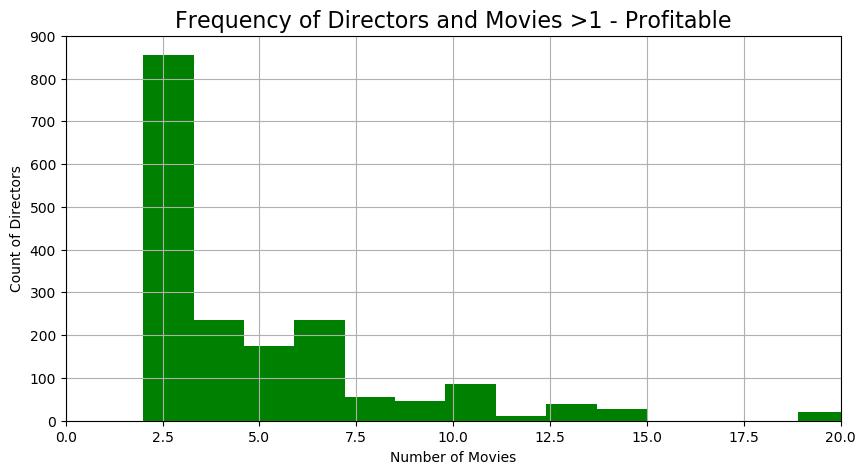

In [344]:
p1_hist = p_minus1.hist(bins=20, figsize = (10,5), color = 'g')
plt.style.use('default')
plt.title('Frequency of Directors and Movies >1 - Profitable', size = 16)
plt.xlabel('Number of Movies')
plt.ylabel('Count of Directors')
plt.xlim(0,20)
plt.ylim(0,900)

plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/limitprofitdirectorhistogram.png')

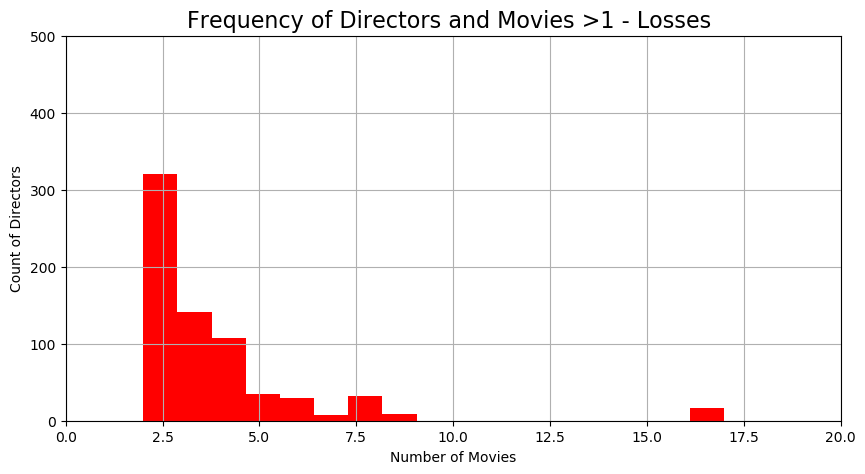

In [312]:
l1_hist = l_minus1.hist(bins=(17), figsize = (10,5), color = 'r')
plt.style.use('default')
plt.title('Frequency of Directors and Movies >1 - Losses ', size = 16)
plt.xlabel('Number of Movies')
plt.ylabel('Count of Directors')
plt.xlim(0,20)
plt.ylim(0,500)
plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/limitlossdirectorhistogram.png')

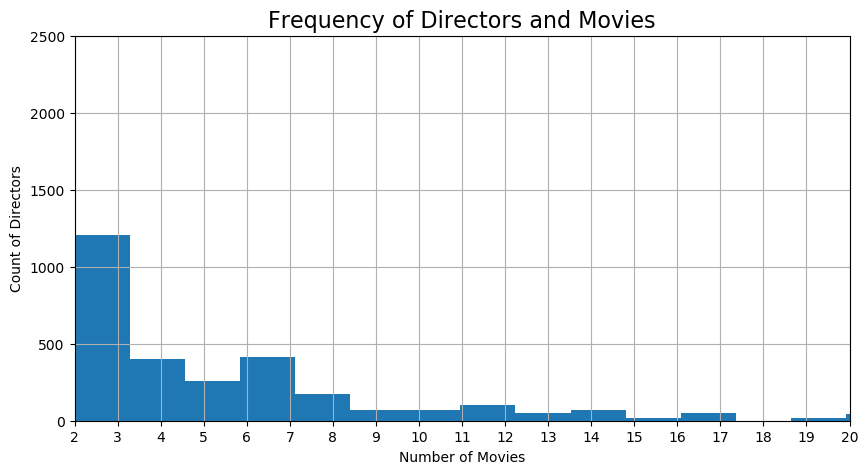

In [313]:
all1_hist = all_minus1.hist(bins=25, figsize = (10,5))
plt.style.use('default')
plt.title('Frequency of Directors and Movies', size = 16)
plt.xlabel('Number of Movies')
plt.ylabel('Count of Directors')
plt.xlim(2,20)
plt.ylim(0,2500)
plt.xticks(np.arange(2, 21, step=1))
plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/limitalldirectorhistogram.png')

In [314]:
profit = (all_train['profitable'].sum(), (all_train['profitable'].count() - all_train['profitable'].sum()))
print(profit)
labels = ['Profit', 'Loss']


(2629, 1818)


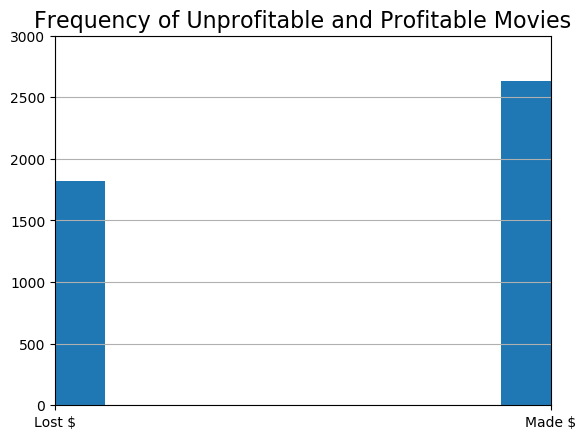

In [315]:
profit_frequency = all_train['profitable'].hist()
plt.style.use('default')
plt.title('Frequency of Unprofitable and Profitable Movies', size = 16)
# plt.ylabel('Count of Movies')
plt.xlim('- $','+ $')
plt.ylim(0,3000)
plt.xticks(np.arange(2), ('Lost $', 'Made $'))
plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/profitandnot.png')


In [316]:
# Title
final_set['title'] = final_set['title'].astype(str)
final_set['title'] = final_set['title'].str.lower()


# Description
final_set['description'] = final_set['description'].astype(str)
final_set['description'] = final_set['description'].str.lower()

# Director
final_set['director'] = final_set['director'].astype(str)
final_set['director'] = final_set['director'].str.lower()

In [317]:
punct_to_remove = string.punctuation

In [318]:
def remove_punctuation(text):
    return text.translate(str.maketrans('','', punct_to_remove))

In [319]:
final_set['description'] = final_set['description'].apply(lambda text: remove_punctuation(text))
final_set['title'] = final_set['title'].apply(lambda text: remove_punctuation(text))

In [320]:
', '.join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [321]:
stop_words = set(stopwords.words('english'))

In [322]:
def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in stop_words])

In [324]:
final_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4447 entries, 232 to 81059
Data columns (total 15 columns):
description                           4447 non-null object
director                              4447 non-null object
imdb_title_id                         4447 non-null object
title                                 4447 non-null object
year                                  4447 non-null int64
duration                              4447 non-null int64
country                               4447 non-null object
budget                                4447 non-null object
usa_gross_income                      4447 non-null int64
worlwide_gross_income                 4447 non-null int64
worlwide_gross_income_gross_income    4447 non-null object
international_gross_income            4447 non-null int64
returns                               4447 non-null int64
profitable                            4447 non-null int64
director_2                            4447 non-null object
dtypes: int6

In [326]:
# Remove Stop Words From Description of Movie


final_set['text'] = final_set['text'].apply(lambda text: remove_stopwords(text))

In [327]:
all_train = final_set
profit_train = final_set.query('profitable == 1').copy()
loss_train = final_set.query('profitable == 0').copy()

In [336]:
def Counter_Words(df_column):
    counter = Counter()
    for text in df_column.values:
        for word in text.split():
            counter[word] += 1
    return counter.most_common(25)

In [337]:
all_movies_top_description = Counter_Words(all_train['description'])
profit_movies_top_description = Counter_Words(profit_train['description'])
loss_movies_top_description = Counter_Words(loss_train['description'])

In [338]:
profit_words = pd.DataFrame(profit_movies_top_description, columns=['words','count']).set_index('words').reset_index()
loss_words =  pd.DataFrame(loss_movies_top_description, columns=['words','count']).set_index('words').reset_index()
all_words = pd.DataFrame(all_movies_top_description, columns=['words','count']).set_index('words').reset_index()

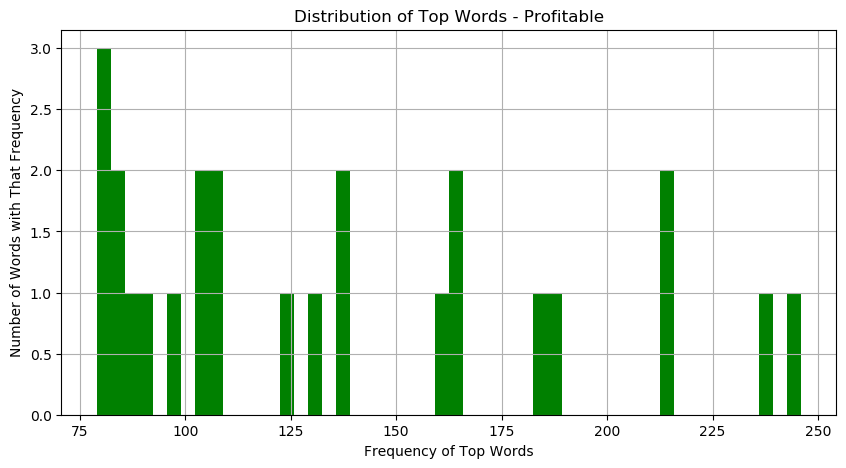

In [94]:
# Profit Movies

profit_words_graph = profit_words.hist(bins=50, figsize = (10,5), color = 'g')
plt.style.use('default')
plt.xlabel('Frequency of Top Words')
plt.ylabel('Number of Words with That Frequency')
plt.title('Distribution of Top Words - Profitable')
plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/profit_top_words_hist.png')

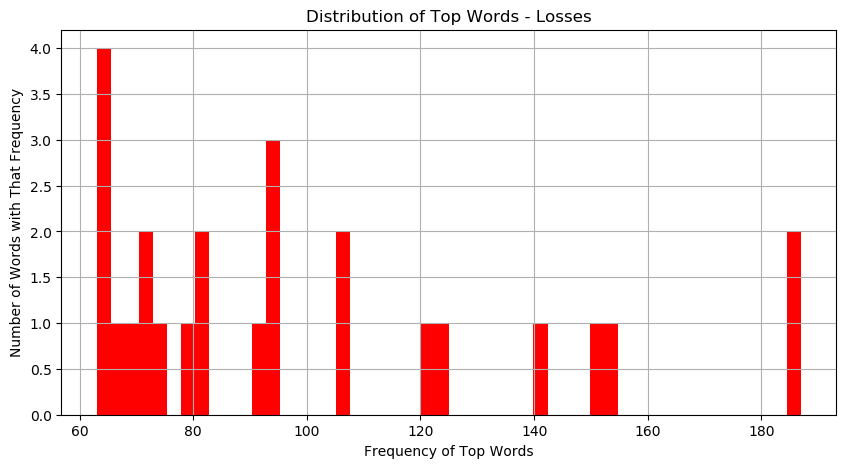

In [95]:
loss_words_graph = loss_words.hist(bins=50, figsize = (10,5), color = 'r')
plt.style.use('default')
plt.xlabel('Frequency of Top Words')
plt.ylabel('Number of Words with That Frequency')
plt.title('Distribution of Top Words - Losses')
plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/not_profit_top_words_hist.png')

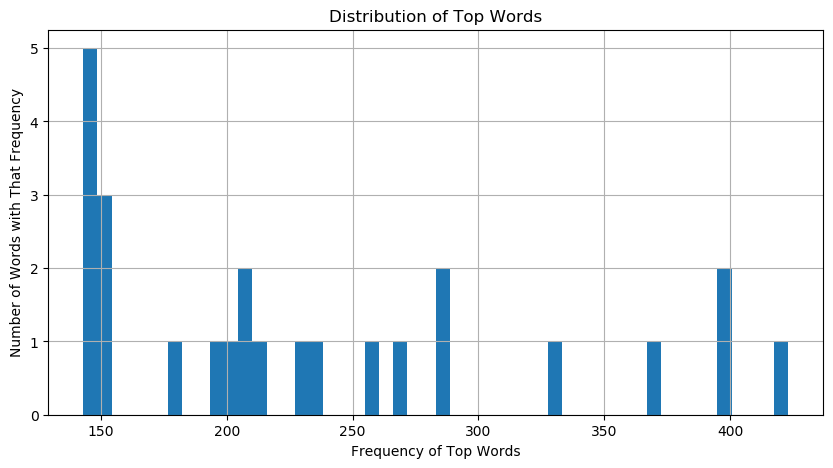

In [96]:
all_words_graph = all_words.hist(bins=50, figsize = (10,5))
plt.style.use('default')
plt.xlabel('Frequency of Top Words')
plt.ylabel('Number of Words with That Frequency')
plt.title('Distribution of Top Words')
plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/top_words_hist.png')

In [ ]:
inal_set['text'] = final_set['text'].apply(lambda text: remove_stopwords(text))

In [ ]:
def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in stop_words])

In [339]:
all_words = all_words.groupby(['words']).agg({'count' : 'sum'}).reset_index()
loss_words = loss_words.groupby(['words']).agg({'count' : 'sum'}).reset_index()
profit_words = profit_words.groupby(['words']).agg({'count' : 'sum'}).reset_index()

In [340]:
all_words['words'] = all_words['words'].apply(lambda text: remove_stopwords(text))

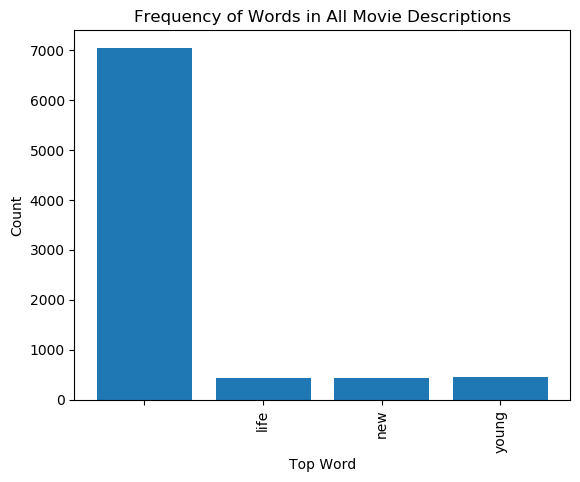

In [341]:
# All Words

plt.bar(all_words['words'], all_words['count'], width=0.8, bottom=None, align='center', data=None)
plt.xticks(rotation=90)
plt.title('Frequency of Words in All Movie Descriptions')
plt.xlabel('Top Word')
plt.ylabel('Count')
plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/word_freq_all.png')


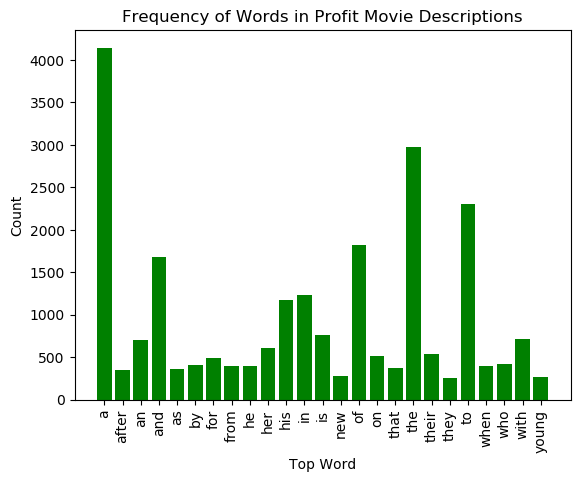

In [342]:
# Profit Words

plt.bar(profit_words['words'], profit_words['count'], width=0.8, bottom=None, align='center', data=None, color = 'g')
plt.xticks(rotation=90)
plt.title('Frequency of Words in Profit Movie Descriptions')
plt.xlabel('Top Word')
plt.ylabel('Count')
plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/word_freq_profit.png')

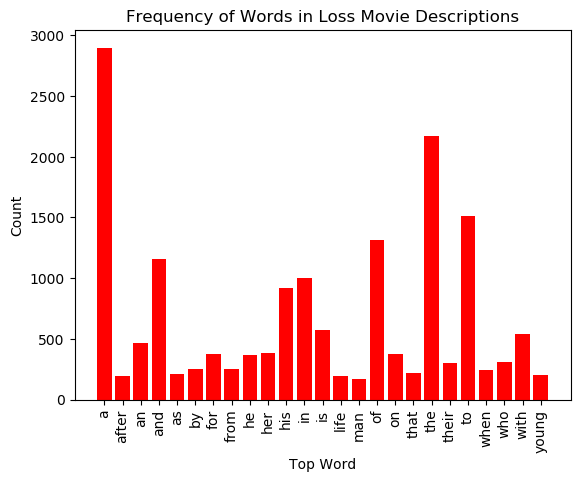

In [343]:
# Loss Words

plt.bar(loss_words['words'], loss_words['count'], width=0.8, bottom=None, align='center', data=None, color = 'r')
plt.xticks(rotation=90)
plt.title('Frequency of Words in Loss Movie Descriptions')
plt.xlabel('Top Word')
plt.ylabel('Count')
plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/word_freq_loss.png')

In [131]:
all_train_directors = all_train[dir_hist_subset]
all_train_directors = all_train_directors.reset_index()

In [132]:
all_train_directors = all_train_directors.drop_duplicates()
all_train_directors = all_train_directors.query('director  1')

In [290]:
all_train_directors['director'] = all_train_directors['director'].astype(str)

In [325]:
final_set['text'] = final_set['title'] + ' ' + final_set['description'] + ' ' + final_set['director']

In [ ]:
# All Directors

plt.bar(all_train[, all_words['count'], width=0.8, bottom=None, align='center', data=None)
plt.xticks(rotation=90)
plt.title('Frequency of Words in All Movie Descriptions')
plt.xlabel('Top Word')
plt.ylabel('Count')
plt.savefig('/Users/jacobtryba/DSI/assignments/capstone2/img/word_freq_all.png')

all_words.groupby(['words']).agg({'count' : 'sum'}).reset_index()

In [138]:
# encouraged to start readme today. write project statement. 
# tfidf
# naive bayes

In [213]:
text = final_set.text.str

In [215]:
type(text)

pandas.core.strings.StringMethods

In [217]:
texlist = list(final_set.text)

In [219]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texlist)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object

In [225]:
final_set.count()

description                           4447
director                              4447
imdb_title_id                         4447
title                                 4447
year                                  4447
duration                              4447
country                               4447
budget                                4447
usa_gross_income                      4447
worlwide_gross_income                 4447
worlwide_gross_income_gross_income    4447
international_gross_income            4447
returns                               4447
profitable                            4447
director_2                            4447
text                                  4447
dtype: int64

In [231]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [228]:
movies.head(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
